# Exploring data with Python - visualize data

In this notebook, we'll apply a few techniques to analyze data with basic statistics and visualize it using graphs.

## Loading our data

Before we begin, let's load the same data about study hours that we analyzed in the previous notebook. We'll also recalculate who passed the class in the same way as last time.

Run the code in the cell below by clicking the **&#9658; Run** button to see the data.

In [1]:
import pandas as pd

# Load data from a text file
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/grades.csv
df_students = pd.read_csv('grades.csv',delimiter=',',header='infer')

# Remove any rows with missing data
df_students = df_students.dropna(axis=0, how='any')

# Calculate who passed, assuming '60' is the grade needed to pass
passes  = pd.Series(df_students['Grade'] >= 60)

# Save who passed to the Pandas dataframe
df_students = pd.concat([df_students, passes.rename("Pass")], axis=1)


# Print the result out into this notebook
df_students 

--2023-12-30 16:07:53--  https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/grades.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8002::154, 2606:50c0:8003::154, 2606:50c0:8001::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8002::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322 [text/plain]
Saving to: ‘grades.csv.1’

grades.csv.1        100%[===================>]     322  --.-KB/s    in 0s      

2023-12-30 16:07:53 (3.70 MB/s) - ‘grades.csv.1’ saved [322/322]



,Name,StudyHours,Grade,Pass
0,Dan,10.00,50.0,False
1,Joann,11.50,50.0,False
2,Pedro,9.00,47.0,False
3,Rosie,16.00,97.0,True
4,Ethan,9.25,49.0,False
5,Vicky,1.00,3.0,False
6,Frederic,11.50,53.0,False
7,Jimmie,9.00,42.0,False
8,Rhonda,8.50,26.0,False
9,Giovanni,14.50,74.0,True


## Visualizing data with Matplotlib

DataFrames provide a great way to explore and analyze tabular data, but sometimes a picture is worth a thousand rows and columns. The **Matplotlib** library provides the foundation for plotting data visualizations that can greatly enhance your ability to analyze the data.

Let's start with a simple bar chart that shows the grade of each student.

**Note**: This first graph may take one to two minutes to render. Subsequent graphs will render more quickly.

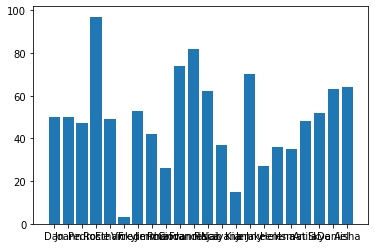

In [2]:
# Ensure plots are displayed inline in the notebook
%matplotlib inline

from matplotlib import pyplot as plt

# Create a bar plot of name vs grade
plt.bar(x=df_students.Name, height=df_students.Grade)

# Display the plot
plt.show()

Well, that worked, but the chart could use some improvements to make it clearer what we're looking at.

Note that you used the **pyplot** class from Matplotlib to plot the chart. This class provides many ways to improve the visual elements of the plot. For example, the following code:

- Specifies the color of the bar chart.
- Adds a title to the chart (so we know what it represents)
- Adds labels to the X and Y axes (so we know which axis shows which data)
- Adds a grid (to make it easier to determine the values for the bars)
- Rotates the X markers (so we can read them)

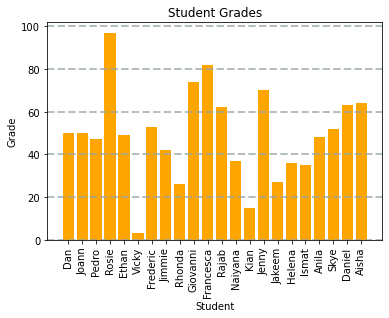

In [6]:
# Create a bar plot of name vs grade
plt.bar(x=df_students.Name, height=df_students.Grade, color='orange')

# Customize the chart
plt.title('Student Grades')
plt.xlabel('Student')
plt.ylabel('Grade')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.xticks(rotation=90)

# Display the plot
plt.show()

A plot is technically contained within a **Figure**. In the previous examples, the figure was created implicitly for you, but you can create it explicitly. For example, the following code creates a figure with a specific size.

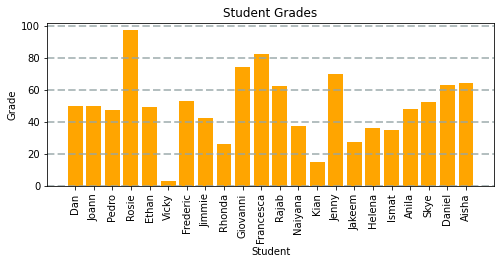

In [11]:
# Create a Figure
fig = plt.figure(figsize=(8,3))

# Create a bar plot of name vs grade
plt.bar(x=df_students.Name, height=df_students.Grade, color='orange')

# Customize the chart
plt.title('Student Grades')
plt.xlabel('Student')
plt.ylabel('Grade')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.xticks(rotation=90)

# Show the figure
plt.show()

A figure can contain multiple subplots, each on its own *axis*.

For example, the following code creates a figure with two subplots: one is a bar chart showing student grades, and the other is a pie chart comparing the number of passing grades to non-passing grades.

<ipython-input-15-386bce8bd2f5>:19: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


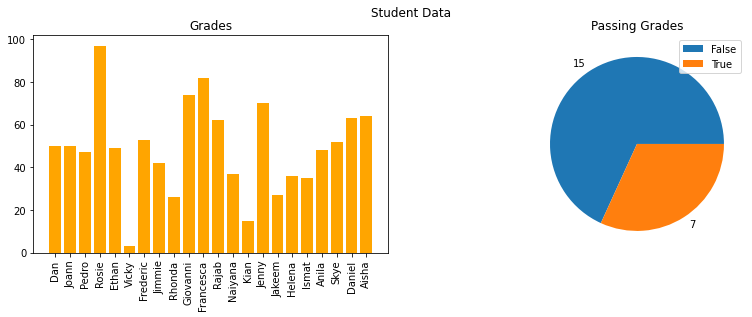

In [15]:
# Create a figure for 2 subplots (1 row, 2 columns)
fig, ax = plt.subplots(1, 2, figsize = (14,4))

# Create a bar plot of name vs grade on the first axis
ax[0].bar(x=df_students.Name, height=df_students.Grade, color='orange')
ax[0].set_title('Grades')
ax[0].set_xticklabels(df_students.Name, rotation=90)

# Create a pie chart of pass counts on the second axis
pass_counts = df_students['Pass'].value_counts()
ax[1].pie(pass_counts, labels=pass_counts)
ax[1].set_title('Passing Grades')
ax[1].legend(pass_counts.keys().tolist())

# Add a title to the Figure
fig.suptitle('Student Data')

# Show the figure
fig.show()

Until now, you've used methods of the `Matplotlib.pyplot` object to plot charts. However, Matplotlib is so foundational to graphics in Python that many packages, including Pandas, provide methods that abstract the underlying Matplotlib functions and simplify plotting. For example, the DataFrame provides its own methods for plotting data as shown in the following example, which plots a bar chart of study hours.

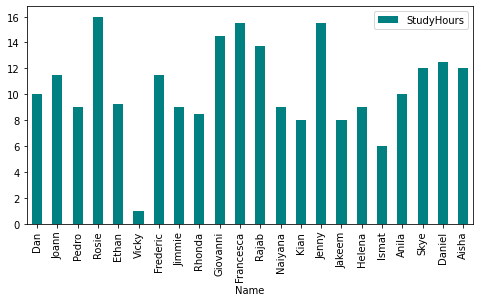

In [17]:
df_students.plot.bar(x='Name', y='StudyHours', color='teal', figsize=(8,4))

## Getting started with statistical analysis

Now that you know how to use Python to manipulate and visualize data, you can start analyzing it.

A lot of data science is rooted in *statistics*, so we'll explore some basic statistical techniques.

> **Note**: This section is <u>not</u> intended to teach you statistics; that's much too big a topic for this notebook. It will, however, introduce you to some statistical concepts and techniques that data scientists use as they explore data in preparation for machine learning modeling.

### Descriptive statistics and data distribution

When examining a *variable* (for example, a sample of student grades), data scientists are particularly interested in its *distribution* (in other words, how all the different grade values are spread across the sample). The starting point for this exploration is often to visualize the data as a histogram and see how frequently each value for the variable occurs.






<ipython-input-18-b1caf6e2331a>:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


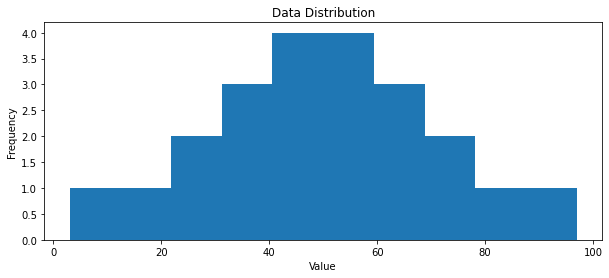

In [18]:
# Get the variable to examine
var_data = df_students['Grade']

# Create a Figure
fig = plt.figure(figsize=(10,4))

# Plot a histogram
plt.hist(var_data)

# Add titles and labels
plt.title('Data Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Show the figure
fig.show()

The histogram for grades is a symmetric shape, where the most frequently occurring grades tend to be in the middle of the range (around 50), with fewer grades at the extreme ends of the scale.

#### Measures of central tendency

To understand the distribution better, we can examine so-called *measures of central tendency*, which is a fancy way of describing statistics that represent the "middle" of the data. The goal of this analysis is to try to find a "typical" value. Common ways to define the middle of the data include:

- The *mean*: A simple average based on adding together all of the values in the sample set and then dividing the total by the number of samples.
- The *median*: The value in the middle of the range of all of the sample values.
- The *mode*: The most commonly occurring value in the sample set<sup>\*</sup>.

Let's calculate these values, along with the minimum and maximum values for comparison, and show them on the histogram.

> <sup>\*</sup>Of course, in some sample sets, there might be a tie for the most common value. In those cases, the dataset is described as *bimodal* or even *multimodal*.

Minimum:3.00
Mean:49.18
Median:49.50
Mode:50.00
Maximum:97.00



<ipython-input-19-d5e08e974966>:36: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


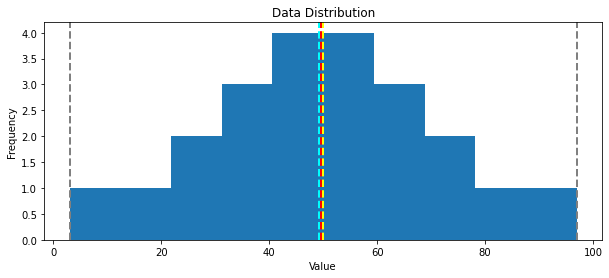

In [19]:
# Get the variable to examine
var = df_students['Grade']

# Get statistics
min_val = var.min()
max_val = var.max()
mean_val = var.mean()
med_val = var.median()
mod_val = var.mode()[0]

print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,
                                                                                        mean_val,
                                                                                        med_val,
                                                                                        mod_val,
                                                                                        max_val))

# Create a Figure
fig = plt.figure(figsize=(10,4))

# Plot a histogram
plt.hist(var)

# Add lines for the statistics
plt.axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
plt.axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
plt.axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
plt.axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
plt.axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

# Add titles and labels
plt.title('Data Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Show the figure
fig.show()

For the grade data, the mean, median, and mode all seem to be more or less in the middle of the minimum and maximum, at around 50.

Another way to visualize the distribution of a variable is to use a *box* plot (sometimes called a *box-and-whiskers* plot). Let's create one for the grade data.

<ipython-input-20-3a87a30ff398>:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


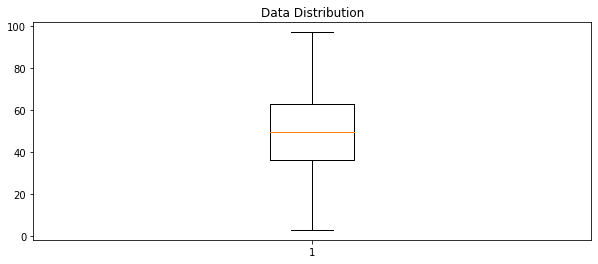

In [20]:
# Get the variable to examine
var = df_students['Grade']

# Create a Figure
fig = plt.figure(figsize=(10,4))

# Plot a histogram
plt.boxplot(var)

# Add titles and labels
plt.title('Data Distribution')

# Show the figure
fig.show()

The box plot shows the distribution of the grade values in a format different from the histogram. The *box* part of the plot shows where the inner two *quartiles* of the data reside. In this case, half of the grades are between approximately 36 and 63. The *whiskers* extending from the box show the outer two quartiles, so the other half of the grades in this case are between 0 and 36 or 63 and 100. The line in the box indicates the *median* value.

For learning, it's useful to combine histograms and box plots, with the box plot's orientation changed to align it with the histogram. (In some ways, it's helpful to think of the histogram as a "front elevation" view of the distribution, and the box plot as a "plan" view of the distribution from above.)

Minimum:3.00
Mean:49.18
Median:49.50
Mode:50.00
Maximum:97.00



<ipython-input-21-24ae117092bd>:40: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


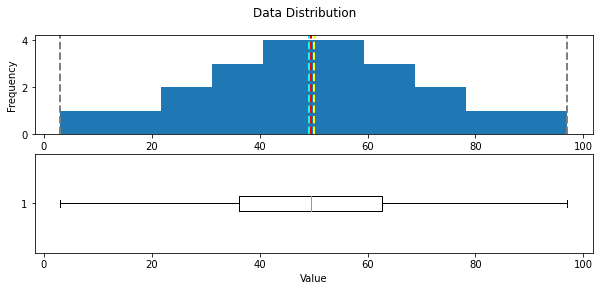

In [21]:
# Create a function that we can re-use
def show_distribution(var_data):
    from matplotlib import pyplot as plt

    # Get statistics
    min_val = var_data.min()
    max_val = var_data.max()
    mean_val = var_data.mean()
    med_val = var_data.median()
    mod_val = var_data.mode()[0]

    print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,
                                                                                            mean_val,
                                                                                            med_val,
                                                                                            mod_val,
                                                                                            max_val))

    # Create a figure for 2 subplots (2 rows, 1 column)
    fig, ax = plt.subplots(2, 1, figsize = (10,4))

    # Plot the histogram   
    ax[0].hist(var_data)
    ax[0].set_ylabel('Frequency')

    # Add lines for the mean, median, and mode
    ax[0].axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

    # Plot the boxplot   
    ax[1].boxplot(var_data, vert=False)
    ax[1].set_xlabel('Value')

    # Add a title to the Figure
    fig.suptitle('Data Distribution')

    # Show the figure
    fig.show()

# Get the variable to examine
col = df_students['Grade']
# Call the function
show_distribution(col)

All of the measurements of central tendency are right in the middle of the data distribution, which is symmetric with values becoming progressively lower in both directions from the middle.

To explore this distribution in more detail, you need to understand that statistics is fundamentally about taking *samples* of data and using probability functions to extrapolate information about the full *population* of data.

What does this mean? *Samples* refer to the data we have on hand, such as information about these 22 students' study habits and grades. The *population* refers to all possible data we could collect, such as every student's grades and study habits across every educational institution throughout the history of time. Usually, we're interested in the population, but it's simply not practical to collect all of that data. Instead, we need to try estimate what the population is like from the small amount of data (samples) that we have.

If we have enough samples, we can calculate something called a *probability density function*, which estimates the distribution of grades for the full population.

The **pyplot** class from Matplotlib provides a helpful plot function to show this density.

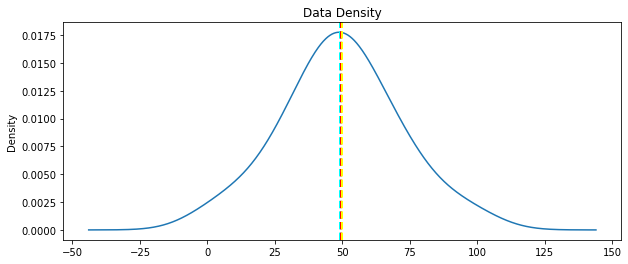

In [22]:
def show_density(var_data):
    from matplotlib import pyplot as plt

    fig = plt.figure(figsize=(10,4))

    # Plot density
    var_data.plot.density()

    # Add titles and labels
    plt.title('Data Density')

    # Show the mean, median, and mode
    plt.axvline(x=var_data.mean(), color = 'cyan', linestyle='dashed', linewidth = 2)
    plt.axvline(x=var_data.median(), color = 'red', linestyle='dashed', linewidth = 2)
    plt.axvline(x=var_data.mode()[0], color = 'yellow', linestyle='dashed', linewidth = 2)

    # Show the figure
    plt.show()

# Get the density of Grade
col = df_students['Grade']
show_density(col)

As expected from the histogram of the sample, the density shows the characteristic "bell curve" of what statisticians call a *normal* distribution with the mean and mode at the center and symmetric tails.

## Summary

Well done! There were a number of new concepts in here, so let's summarize. 

Here, we:

1. Made graphs with Matplotlib.
2. Learned how to customize these graphs.
3. Calculated basic statistics, such as medians.
4. Looked at the spread of data using box plots and histograms.
5. Learned about samples versus populations.
6. Estimated what the population of grades might look like from a sample of grades.

In our next notebook, we'll look at spotting unusual data and finding relationships between data.

## Further Reading

To learn more about the Python packages you explored in this notebook, see the following documentation:

- [NumPy](https://numpy.org/doc/stable/)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/)
- [Matplotlib](https://matplotlib.org/contents.html)